# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
import xgboost as xgb
from sklearn.pipeline import make_pipeline
from imblearn.under_sampling import RandomUnderSampler
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Load The Data 

In [2]:
df = pd.read_csv('/kaggle/input/titanic-dataset/Titanic-Dataset.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# EDA (Exploratory Data Analysis)

In [4]:
#first 10 rows
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [5]:
#shape of the data
df.shape

(891, 12)

In [6]:
#data type of each column
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [7]:
#number of nulls in the data
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
#information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
#statistical measures of each column
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [10]:
#value counts of Survived column to check the balance
df['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

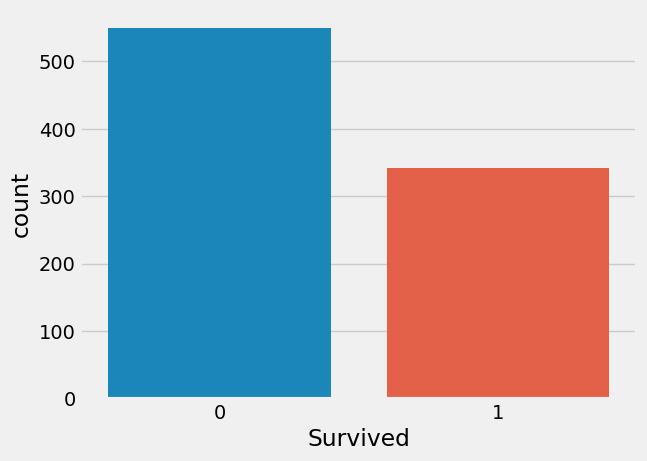

In [11]:
#countplot for Survived Column
sns.countplot(x = 'Survived', data = df)
plt.show()

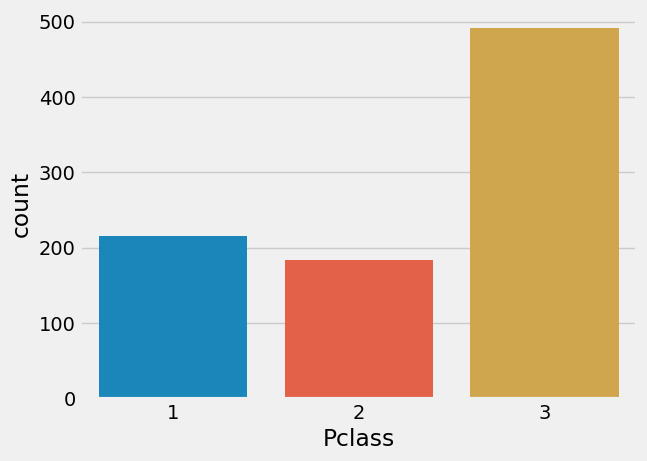

In [12]:
#countplot for Pclass Column
sns.countplot(x = 'Pclass', data = df)
plt.show()

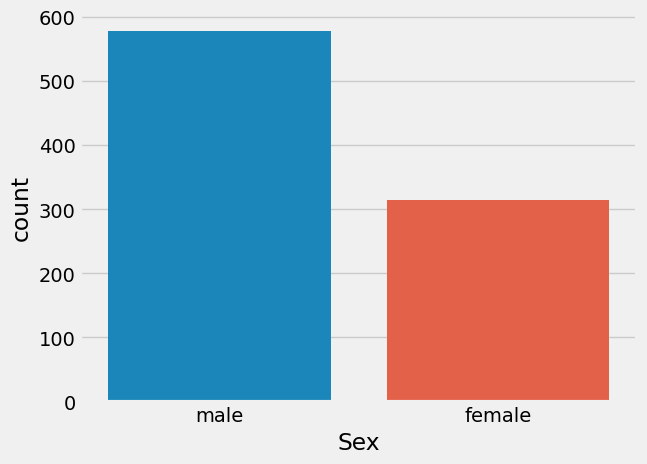

In [13]:
#countplot for Sex Column
sns.countplot(x = 'Sex', data = df)
plt.show()

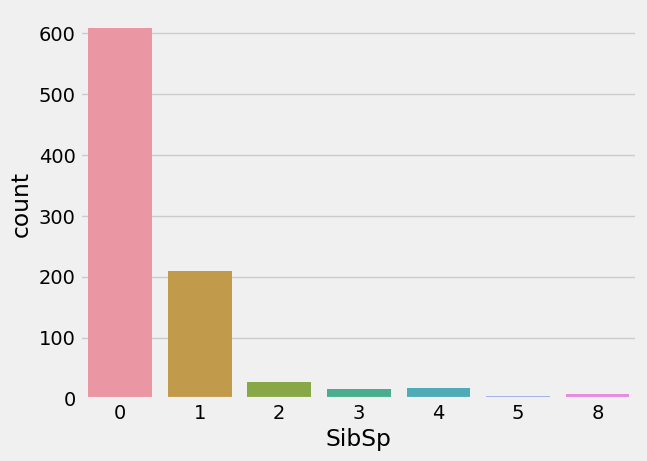

In [14]:
#countplot for SibSp Column
sns.countplot(x = 'SibSp', data = df)
plt.show()

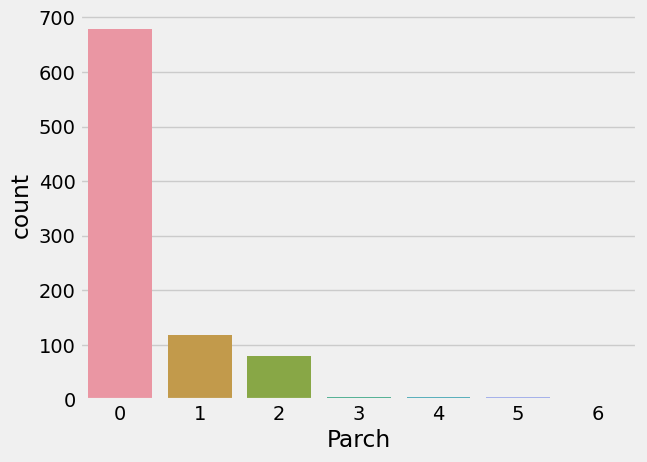

In [15]:
#countplot for Parch Column
sns.countplot(x = 'Parch', data = df)
plt.show()

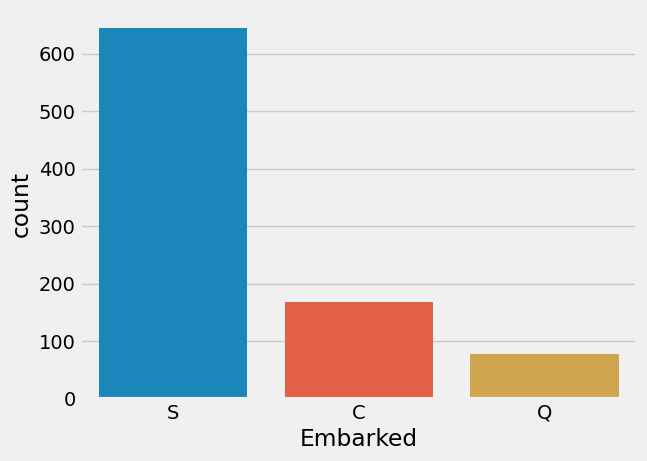

In [16]:
#countplot for Embarked Column
sns.countplot(x = 'Embarked', data = df)
plt.show()

<Axes: xlabel='Age', ylabel='Density'>

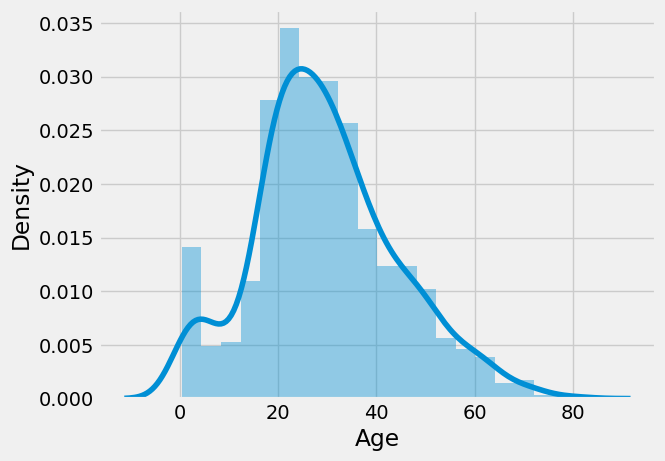

In [17]:
#histogram for Age column
sns.distplot(df['Age'])

<Axes: xlabel='Fare', ylabel='Density'>

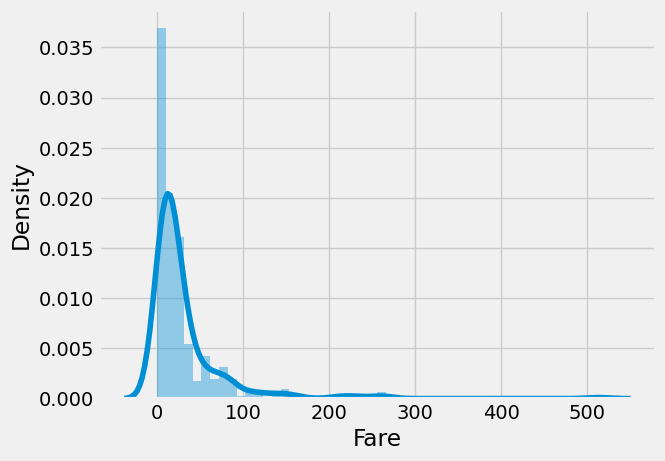

In [18]:
#histogram for Fare column
sns.distplot(df['Fare'])

# Data Pre-Processing

In [19]:
#handling null values

#fill null values in Age Column and Fare Column with median
df['Age'].fillna(df['Age'].median(), inplace = True)
df['Fare'].fillna(df['Fare'].median(), inplace = True)

#dropping Cabin column because it has many nulls
df.drop(columns = ['Cabin'], inplace = True)

#fill null values in Survived Column and Embarked Column with mode
df['Survived'].fillna(df['Survived'].mode()[0], inplace = True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace = True)

In [20]:
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

<Axes: xlabel='Fare', ylabel='Density'>

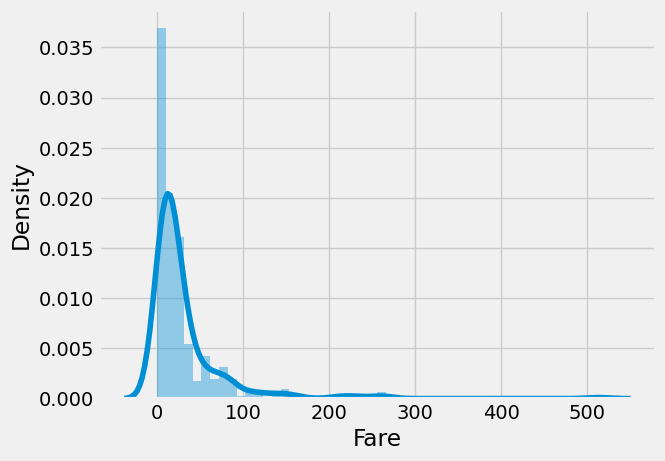

In [21]:
sns.distplot(df['Fare'])

In [22]:
#handling the skewness in Fare column using log transformation
df['Fare'] = np.log(df['Fare']+1)

<Axes: xlabel='Fare', ylabel='Density'>

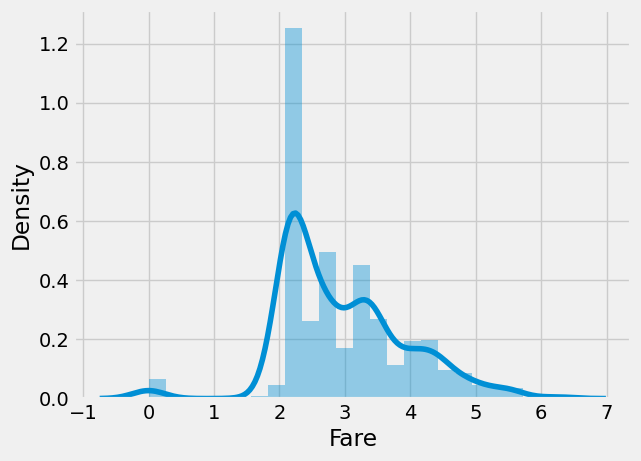

In [23]:
sns.distplot(df['Fare'])

In [24]:
#drop unnecessary columns
df.drop(columns = ['Name', 'Ticket'], inplace = True)
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,2.110213,S
1,2,1,1,female,38.0,1,0,4.280593,C
2,3,1,3,female,26.0,0,0,2.188856,S
3,4,1,1,female,35.0,1,0,3.990834,S
4,5,0,3,male,35.0,0,0,2.202765,S


In [25]:
#label encoding to Sex and Embarked columns
label_encoder = LabelEncoder()
columns_to_encode = ['Sex', 'Embarked']

for column in columns_to_encode:
    df[column] = label_encoder.fit_transform(df[column])

In [26]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.0,1,0,2.110213,2
1,2,1,1,0,38.0,1,0,4.280593,0
2,3,1,3,0,26.0,0,0,2.188856,2
3,4,1,1,0,35.0,1,0,3.990834,2
4,5,0,3,1,35.0,0,0,2.202765,2


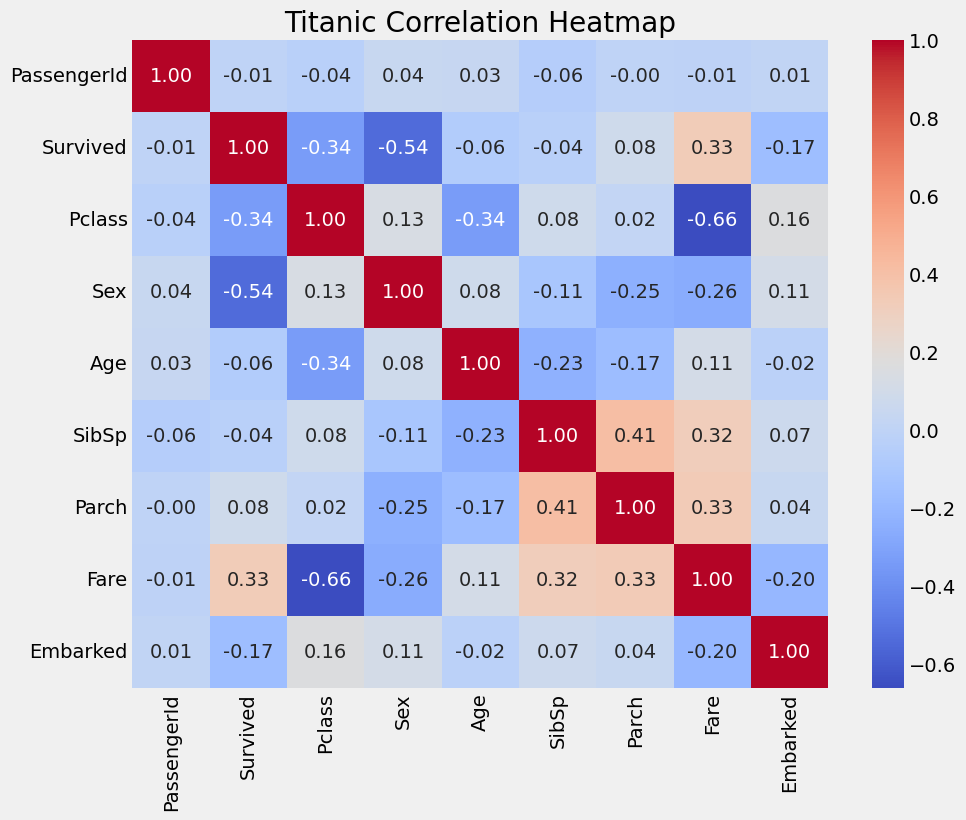

In [27]:
#heatmap for correlation
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")

plt.title('Titanic Correlation Heatmap')
plt.show()

# Modelling

In [28]:
#splitting the dataset
X = df.drop(columns=['Survived'])
y = df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#applying undersampling for imbalanced classes
undersampler = RandomUnderSampler(random_state=42)
X_train, y_train = undersampler.fit_resample(X_train, y_train)

#all models we will apply
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Support Vector Machine": SVC(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Gaussian Naive Bayes": GaussianNB(),
    "Linear Discriminant Analysis": LinearDiscriminantAnalysis(),
    "Quadratic Discriminant Analysis": QuadraticDiscriminantAnalysis(),
    "XGBoost": xgb.XGBClassifier(),
}

#applying the models and Classification Reports
for name, model in models.items():
    pipeline = make_pipeline(StandardScaler(), model) 
    
    pipeline.fit(X_train, y_train)
    
    y_pred = pipeline.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name}: Accuracy = {accuracy:.2f}\n")
    print(classification_report(y_test, y_pred))
    print("="*50)

Logistic Regression: Accuracy = 0.82

              precision    recall  f1-score   support

           0       0.88      0.80      0.84       105
           1       0.75      0.85      0.80        74

    accuracy                           0.82       179
   macro avg       0.82      0.83      0.82       179
weighted avg       0.83      0.82      0.82       179

Decision Tree: Accuracy = 0.73

              precision    recall  f1-score   support

           0       0.83      0.69      0.75       105
           1       0.64      0.80      0.71        74

    accuracy                           0.73       179
   macro avg       0.73      0.74      0.73       179
weighted avg       0.75      0.73      0.73       179

Random Forest: Accuracy = 0.82

              precision    recall  f1-score   support

           0       0.86      0.82      0.84       105
           1       0.76      0.81      0.78        74

    accuracy                           0.82       179
   macro avg       0.81   